In [23]:
import math

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import Math, display
from scipy.integrate import quad

# Exercise 6

In [24]:
# define global Parameters
class OscillatorParams:
    def __init__(self):        
        self.hbar = 1.0  # Planck's constant
        self.m = 1.0  # Mass of the oscillator
        self.x0 = 1  # Characteristic length scale
        self.omega = self.hbar / (2 * self.m * self.x0**2)  # Frequency of the oscillator
        self.p0 = self.hbar/2        

osc_params = OscillatorParams()

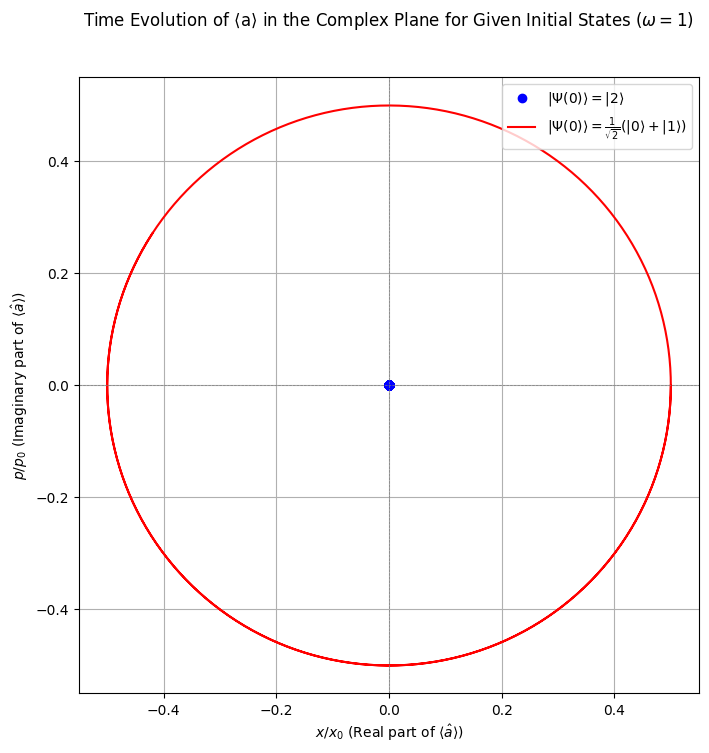

In [25]:
# Define parameters
_omega = 1  # Frequency
t_vals = np.linspace(0, 10, 300)  # Time values for evolution

# Initial states for ⟨a⟩ expectations

# State |2⟩, remains zero over time
a_expect_state1 = np.zeros_like(t_vals, dtype=complex)

# State (1/sqrt(2))(|0⟩ + |1⟩), circular motion
a_expect_state2 = (1 / 2) * np.exp(-1j * _omega * t_vals)

# Plotting ⟨a⟩ in the complex plane for both cases
plt.figure(figsize=(8, 8))

# Plot for |Ψ(0)⟩ = |2⟩
plt.plot(
    a_expect_state1.real,
    a_expect_state1.imag,
    "o",
    label=r"$|\Psi(0)\rangle = |2\rangle$",
    color="blue",
)

# Plot for |Ψ(0)⟩ = (1/√2)(|0⟩ + |1⟩)
plt.plot(
    a_expect_state2.real,
    a_expect_state2.imag,
    label=r"$|\Psi(0)\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$",
    color="red",
)

# Formatting the plot
plt.axhline(0, color="gray", linestyle="--", linewidth=0.5)
plt.axvline(0, color="gray", linestyle="--", linewidth=0.5)
plt.xlabel(r"$x/x_0$ (Real part of $\langle \hat{a} \rangle$)")
plt.ylabel(r"$p/p_0$ (Imaginary part of $\langle \hat{a} \rangle$)")
plt.legend(loc="upper right")
plt.title(
    "Time Evolution of ⟨a⟩ in the Complex Plane for Given Initial States ($\omega = 1$) \n\n"
)
plt.grid(True)
plt.savefig("images/ex_6")
plt.show()

# Exercise 7

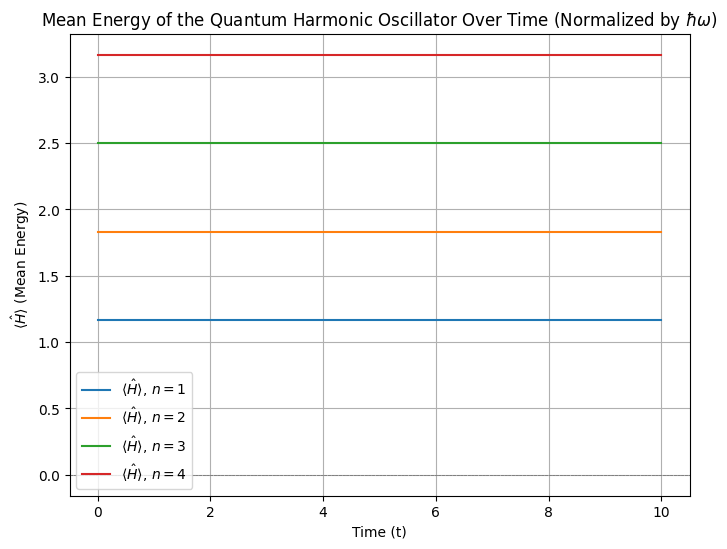

In [26]:
plt.figure(figsize=(8, 6))

# Choose any n > 0
for n in range(1, 5):
    # Calculate energy levels for the harmonic oscillator
    energy_levels = (n + 0.5) * osc_params.hbar * osc_params.omega  # Energy of state |n⟩
    ground_state_energy = 0.5 * osc_params.hbar * osc_params.omega  # Energy of state |0⟩

    # Calculate the mean energy ⟨H⟩ as a function of time
    # The state is a superposition of |0⟩ and |n⟩
    # ⟨Ψ(t)|H|Ψ(t)⟩ = |c_0|^2 E_0 + |c_n|^2 E_n
    mean_energy = (1 / 3) * ground_state_energy + (2 / 3) * energy_levels

    # Mean energy remains constant over time
    mean_energy_time = np.full_like(t_vals, mean_energy / (osc_params.hbar * osc_params.omega))

    # Plotting the mean energy over time
    plt.plot(
        t_vals, mean_energy_time, label=r"$\langle \hat H \rangle$, $n={}$".format(n)
    )

    # Formatting the plot
    plt.axhline(0, color="gray", linestyle="--", linewidth=0.5)

plt.xlabel("Time (t)")
plt.ylabel(r"$\langle \hat{H} \rangle$ (Mean Energy)")
plt.title(
    "Mean Energy of the Quantum Harmonic Oscillator Over Time (Normalized by $\hbar \omega$)"
)
plt.legend()
plt.grid(True)
plt.savefig("images/ex_7")
plt.show()

# Exercise 12

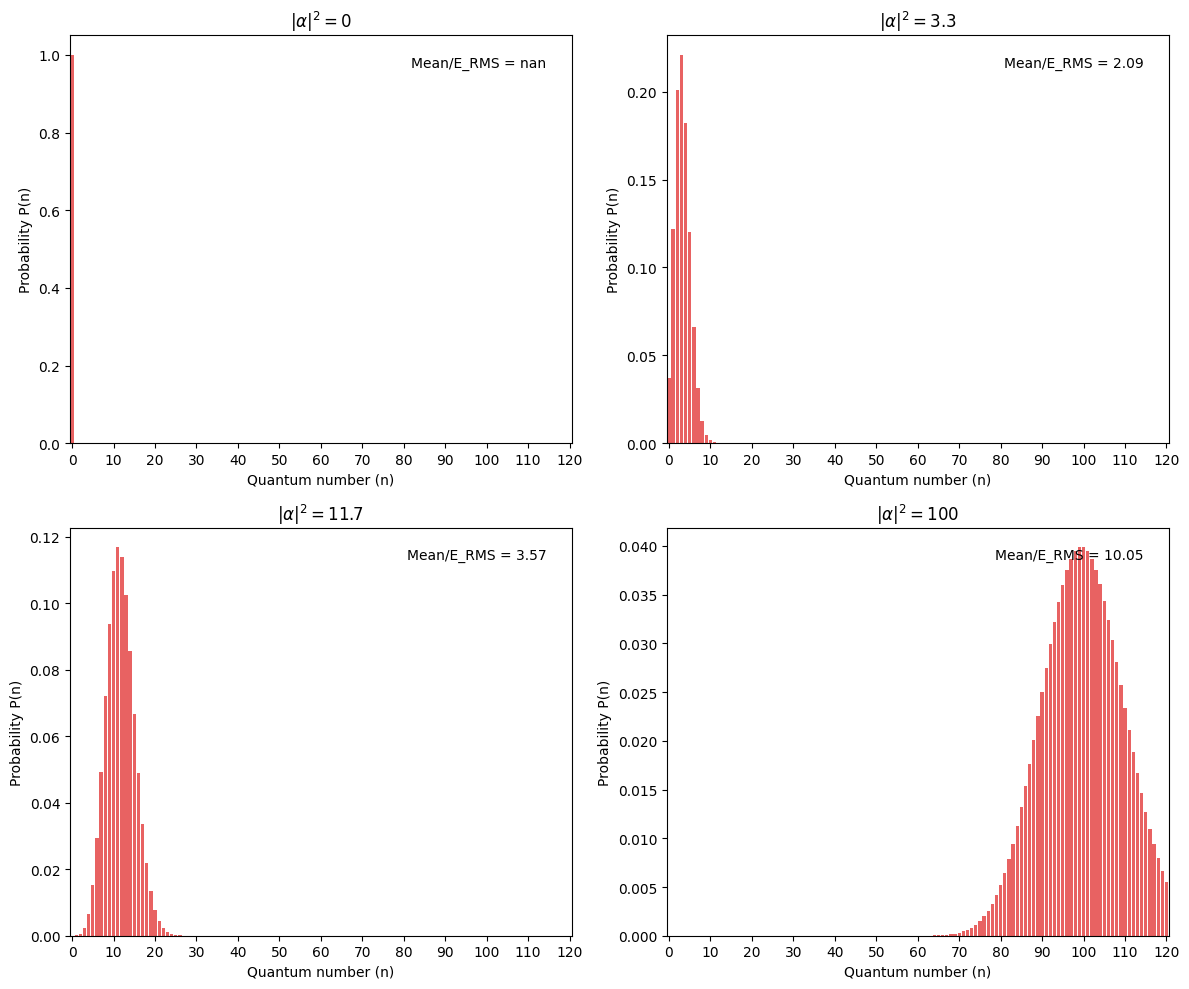

In [27]:
# Define parameters
alpha_squared_values = [0, 3.3, 11.7, 100]  # Values of |alpha|^2
Nmax = 120  # Maximum quantum number to consider for histogram

# Plot the histograms for each alpha^2 value
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, alpha_squared in enumerate(alpha_squared_values):
    # Generate quantum numbers and probabilities
    n_values = np.arange(Nmax + 1)
    probabilities = []
    n = n_values[0]
    probabilities.append(
        np.exp(-alpha_squared) * (alpha_squared**n) / math.factorial(n)
    )
    for n in n_values[1:]:
        probabilities.append(probabilities[-1] * alpha_squared / n)

    # Plot histogram
    sns.barplot(x=n_values, y=probabilities, alpha=0.7, ax=axes[i], color="r")
    # axes[i].bar(n_values, probabilities, alpha=0.7)
    axes[i].set_title(r"$|\alpha|^2 = {}$".format(alpha_squared))
    axes[i].set_xticks(np.arange(0, Nmax + 1, 10))
    axes[i].set_xlabel("Quantum number (n)")
    axes[i].set_ylabel("Probability P(n)")

    # Calculate the mean energy and E_RMS
    mean_energy = osc_params.omega * (alpha_squared + 0.5)
    erms = np.sqrt(osc_params.omega**2 * alpha_squared)
    ratio = mean_energy / erms if erms != 0 else np.nan

    # Display ratio in plot
    axes[i].text(
        0.95,
        0.95,
        f"Mean/E_RMS = {ratio:.2f}",
        ha="right",
        va="top",
        transform=axes[i].transAxes,
    )

plt.tight_layout()
plt.savefig("images/ex_12")
plt.show()

# Exercise 15

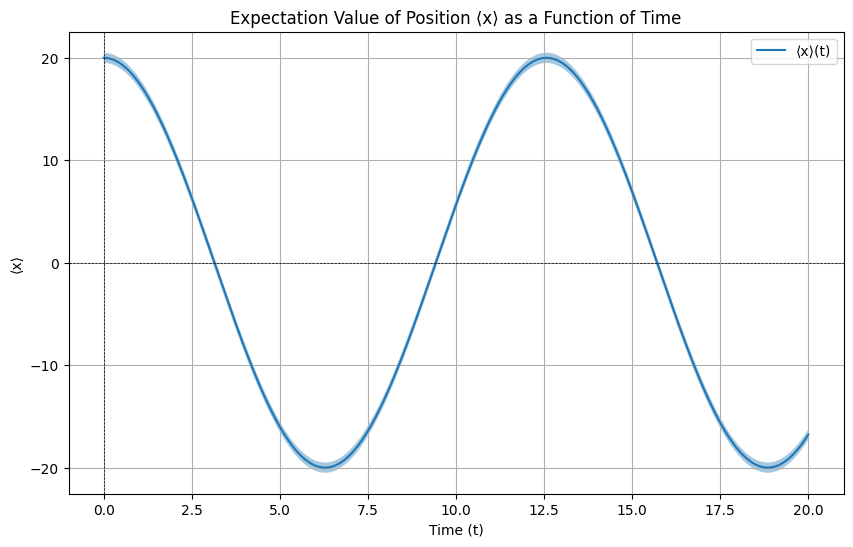

In [28]:
# Parameters
alpha_0 = 10  # Coherent state parameter

# RMS position
x_RMS = osc_params.x0

# Time array
t = np.linspace(0, 20, 1000)

# Expectation value of position ⟨x⟩
x_expectation = osc_params.x0 * 2 * np.real(alpha_0) * np.cos(osc_params.omega * t)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, x_expectation, label="⟨x⟩(t)")
plt.fill_between(t, x_expectation - x_RMS/2, x_expectation + x_RMS/2, alpha=0.4)
plt.title("Expectation Value of Position ⟨x⟩ as a Function of Time")
plt.xlabel("Time (t)")
plt.ylabel("⟨x⟩")
plt.axhline(0, color="black", lw=0.5, ls="--")  # x=0 line
plt.axvline(0, color="black", lw=0.5, ls="--")  # y=0 line
plt.grid()
plt.legend()
plt.savefig("images/ex_15")

plt.show()

# Exercise 28

$$
\Psi_{n}(x) = \frac{1}{\sqrt{n}} \left( \frac{x}{x_0} \Psi_{n-1}(x) - \sqrt{n-1} \Psi_{n-2}(x) \right)
$$

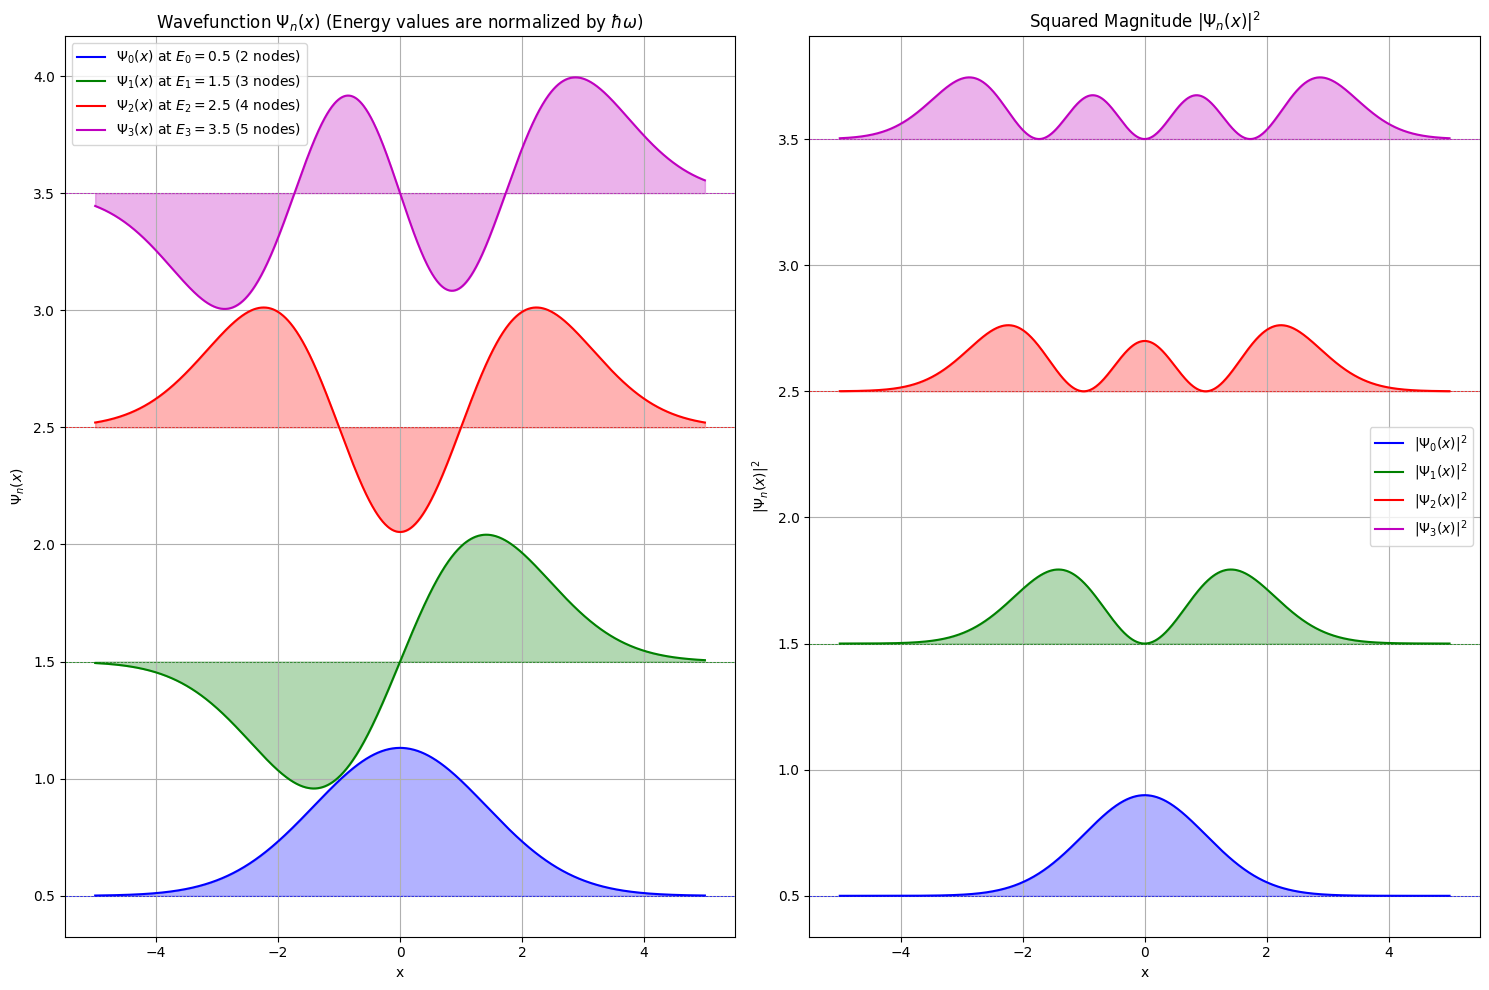

In [29]:
# Constants
x_vals = np.linspace(-5 * osc_params.x0, 5 * osc_params.x0, 1000)  # x values

def psi(n, x, return_all=False):
    # Bottom up

    all_psi = []  # From 0 till n

    prev1_psi = 0.0
    if n == -1:
        return prev1_psi

    prev2_psi = np.exp(-((x / (2 * osc_params.x0)) ** 2)) / (np.sqrt(np.sqrt(2 * np.pi * (osc_params.x0**2))))
    all_psi.append(prev2_psi)
    if n == 0:
        return all_psi if return_all else prev2_psi

    for i in range(1, n + 1):
        curr = ((x / osc_params.x0) * prev2_psi - np.sqrt(i - 1) * prev1_psi) / np.sqrt(i)
        prev1_psi = prev2_psi
        prev2_psi = curr
        all_psi.append(curr)

    return all_psi if return_all else curr


psis = psi(3, x_vals, True)

# Plot the wavefunctions
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

axes[0].set_title(
    "Wavefunction $\Psi_n(x)$ (Energy values are normalized by $\hbar \omega$)"
)

for n, (psi_n, color) in enumerate(zip(psis, ["b", "g", "r", "m"])):
    energy_level = (n + 0.5) * osc_params.hbar * osc_params.omega

    normalized_energy_level = energy_level / (osc_params.hbar * osc_params.omega)

    # Shift the wavefunction by its energy level for vertical stacking
    axes[0].plot(
        x_vals,
        normalized_energy_level + psi_n,
        color=color,
        label=f"$\Psi_{n}(x)$ at $E_{n} = {normalized_energy_level:.1f}$ ({n + 2} nodes)",
    )
    axes[0].fill_between(
        x_vals,
        normalized_energy_level,
        normalized_energy_level + psi_n,
        color=color,
        alpha=0.3,
    )

    # Draw horizontal lines for energy levels
    axes[0].axhline(
        y=normalized_energy_level, color=color, linestyle="--", linewidth=0.5
    )

axes[0].set_xlabel("x")
axes[0].set_ylabel(r"$\Psi_n(x)$")
axes[0].grid(True)
axes[0].legend()

axes[1].set_title("Squared Magnitude $|\Psi_n(x)|^2$")

for n, (psi_n, color) in enumerate(zip(psis, ["b", "g", "r", "m"])):
    energy_level = (n + 0.5) * osc_params.hbar * osc_params.omega

    normalized_energy_level = energy_level / (osc_params.hbar * osc_params.omega)

    # Shift the wavefunction by its energy level for vertical stacking
    axes[1].plot(
        x_vals,
        normalized_energy_level + np.abs(psi_n) ** 2,
        color=color,
        label=f"$|\Psi_{n}(x)|^2$",
    )
    axes[1].fill_between(
        x_vals,
        normalized_energy_level,
        normalized_energy_level + np.abs(psi_n) ** 2,
        color=color,
        alpha=0.3,
    )

    # Draw horizontal lines for energy levels
    axes[1].axhline(
        y=normalized_energy_level, color=color, linestyle="--", linewidth=0.5
    )

axes[1].set_xlabel("x")
axes[1].set_ylabel(r"$|\Psi_n(x)|^2$")
axes[1].grid(True)
axes[1].legend()


plt.tight_layout()
plt.savefig("images/ex_28")
plt.show()

In [30]:
quad(lambda x: np.abs(psi(0, x)) ** 2, -np.inf, np.inf)[0]

0.9999999999999997

# Exercise 29

In [31]:
int_text = "\int_{-\infty}^\infty"
for n in [0, 1, 2]:
    res, _ = quad(lambda x: np.abs(psi(n, x)) ** 2, -np.inf, np.inf)
    psi_text = f"|\Psi_{n}(x)|^2"
    display(Math(r"{} {} \, dx = {:.4f}".format(int_text, psi_text, res)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Exercise 30

In [32]:
int_text = "\int_{-\infty}^\infty"
for n in [0, 1, 2]:
    res, _ = quad(lambda x: psi(n, x) * psi((n + 1) % 3, x), -np.inf, np.inf)
    psi_text = f"\Psi_{n}(x) \Psi_{(n+1)%3}(x)"
    display(Math(r"{} {} \, dx = {:.4f}".format(int_text, psi_text, res)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Exercise 31

In [33]:
prob_psi_0 = np.abs(psis[0]) ** 2
prob_psi_1 = np.abs(psis[0]) ** 2
prob_psi_2 = np.abs(psis[0]) ** 2

xrms = lambda n: osc_params.x0 * np.sqrt(2 * n + 1)

for n in [0, 1, 2]:
    x_rms_value = xrms(n)
    prob, _ = quad(lambda x: np.abs(psi(n, x)) ** 2, -x_rms_value, x_rms_value)
    text = f". n={n}) = {prob:.4f}"
    display(Math(r"{} {} = {:.4f}".format("P(|x| < x_{RMS}", f", n={n})", prob)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

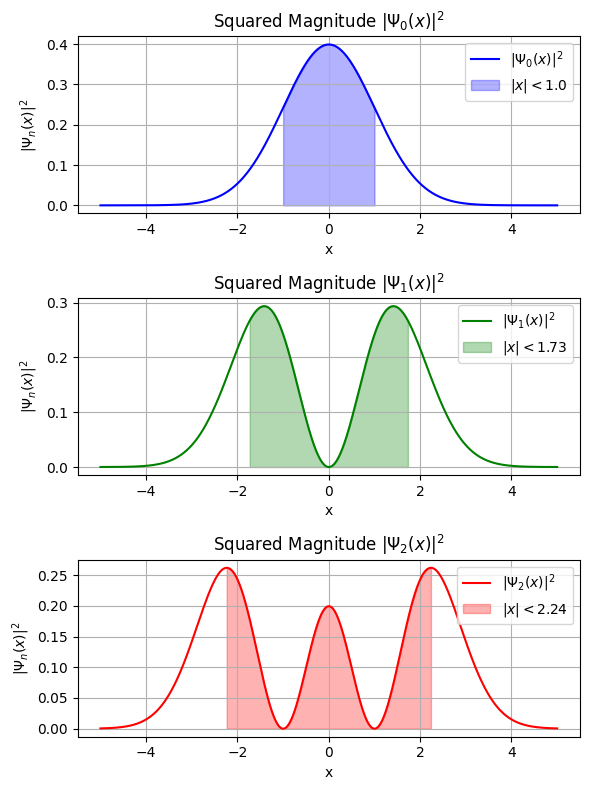

In [34]:
fig, axes = plt.subplots(3, 1, figsize=(6, 8))

# Plot the squared magnitudes
for n, c in zip([0, 1, 2], ["b", "g", "r"]):
    axes[n].plot(
        x_vals,
        np.abs(psi(n, x_vals)) ** 2,
        label=r"$|\Psi_{}(x)|^2$".format(n),
        color=c,
    )
    xrms_vals = np.linspace(-xrms(n), xrms(n), 100)
    axes[n].fill_between(
        xrms_vals,
        0,
        (np.abs(psi(n, xrms_vals)) ** 2),
        color=c,
        alpha=0.3,
        label=r"$|x| < {:.3}$".format(xrms(n)),
    )
    axes[n].set_title("Squared Magnitude $|\Psi_{}(x)|^2$".format(n))
# # Labels and titles
for i, ax in enumerate(axes):
    ax.set_xlabel("x")
    ax.set_ylabel(r"$|\Psi_n(x)|^2$")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.savefig("images/ex_31")
plt.show()

# Exercise 32

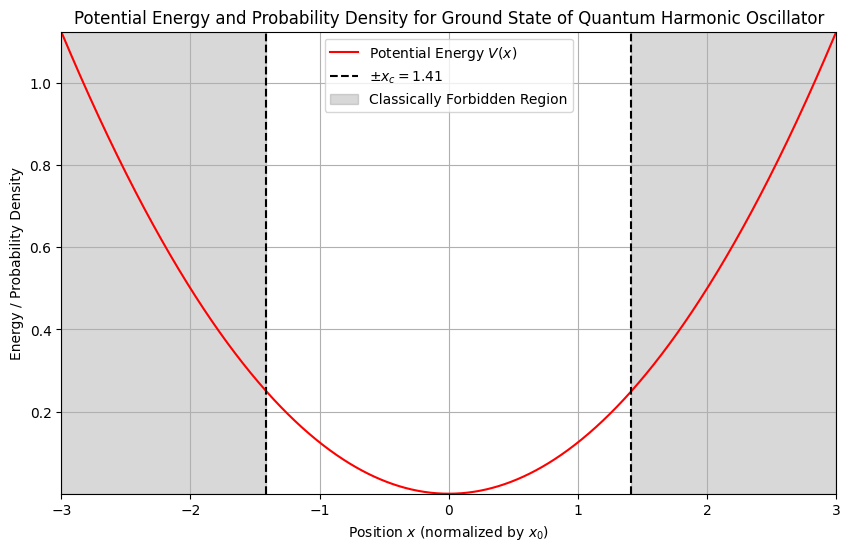

In [35]:
# Define the potential energy function V(x)
def V(x):
    return (1 / 2) * osc_params.m * osc_params.omega**2 * x**2


# Define x-range and calculate values for V(x) and |Ψ0(x)|^2
x_vals = np.linspace(-3 * osc_params.x0, 3 * osc_params.x0, 1000)
V_vals = V(x_vals)

# Plotting
plt.figure(figsize=(10, 6))

# Plot V(x)
plt.plot(x_vals, V_vals, label="Potential Energy $V(x)$", color="red")

# Mark the classical turning points ±x_c
# x_c = np.sqrt(2) * osc_params.x0
x_c = osc_params.x0 * np.sqrt(2 * (2 * 0 +  1))
plt.axvline(
    x_c,
    color="black",
    linestyle="--",
    label=r"$\pm x_c = {:.2f}$".format(x_c),
)
plt.axvline(-x_c, color="black", linestyle="--")
plt.fill_between(
    x_vals,
    0,
    [V_vals.max()] * len(x_vals),
    where=(x_vals < -x_c) | (x_vals > x_c),
    color="gray",
    alpha=0.3,
    label="Classically Forbidden Region",
)
plt.xlim(-3 * osc_params.x0, 3 * osc_params.x0)
plt.ylim(min(V_vals), max(V_vals))

# Labels and Legend
plt.xlabel("Position $x$ (normalized by $x_0$)")
plt.ylabel("Energy / Probability Density")
plt.title(
    "Potential Energy and Probability Density for Ground State of Quantum Harmonic Oscillator"
)
plt.legend()
plt.grid(True)
plt.savefig("images/ex_32")
plt.show()

# Exercise 33

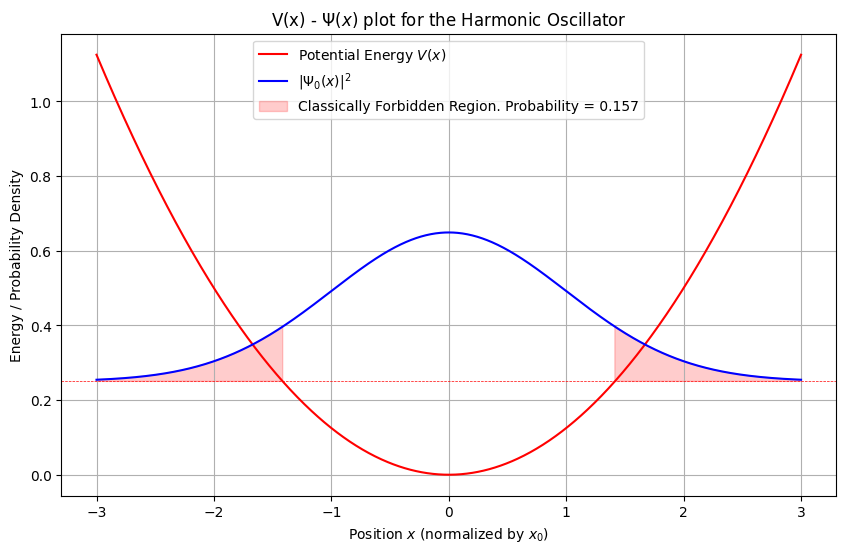

In [36]:
# Define x values for plotting
x_vals = np.linspace(-3 * osc_params.x0, 3 * osc_params.x0, 1000)

# Calculate values for |Ψ_0(x)|^2 and V(x)
psi_vals = np.abs(psi(0, x_vals)) ** 2
V_vals = V(x_vals)

# Plot the "V(x) - Ψ(x)" plot by stacking the potential and wavefunction
plt.figure(figsize=(10, 6))

# Plot the potential energy curve and wavefunction squared in the first subplot
xc = osc_params.x0 * np.sqrt(2 * (2 * 0 +  1))
prob_allowed, _ = quad(lambda x: np.abs(psi(0, x)) ** 2, -xc, xc)
prob_forbidden = 1 - prob_allowed

plt.plot(x_vals, V_vals, label="Potential Energy $V(x)$", color="red")
plt.plot(
    x_vals, psi_vals + (0 + 0.5) * osc_params.hbar * osc_params.omega, label="$|\\Psi_0(x)|^2$", color="blue"
)
plt.fill_between(
    x_vals,
    (0 + 0.5) * osc_params.hbar * osc_params.omega,
    psi_vals + (0 + 0.5) * osc_params.hbar * osc_params.omega,  # shifted by normalized energy level
    where=(x_vals < -xc) | (x_vals > xc),
    color="red",
    alpha=0.2,
    label=f"Classically Forbidden Region. Probability = {prob_forbidden:.3f}",
)
plt.axhline(y=(0 + 0.5) * osc_params.hbar * osc_params.omega, color="red", linestyle="--", linewidth=0.5)

# Add labels and legend to the first plot
plt.xlabel("Position $x$ (normalized by $x_0$)")
plt.ylabel("Energy / Probability Density")
plt.title("V(x) - $\\Psi(x)$ plot for the Harmonic Oscillator")
plt.legend()
plt.grid(True)
plt.savefig("images/ex_33")
plt.show()

# Exercise 34

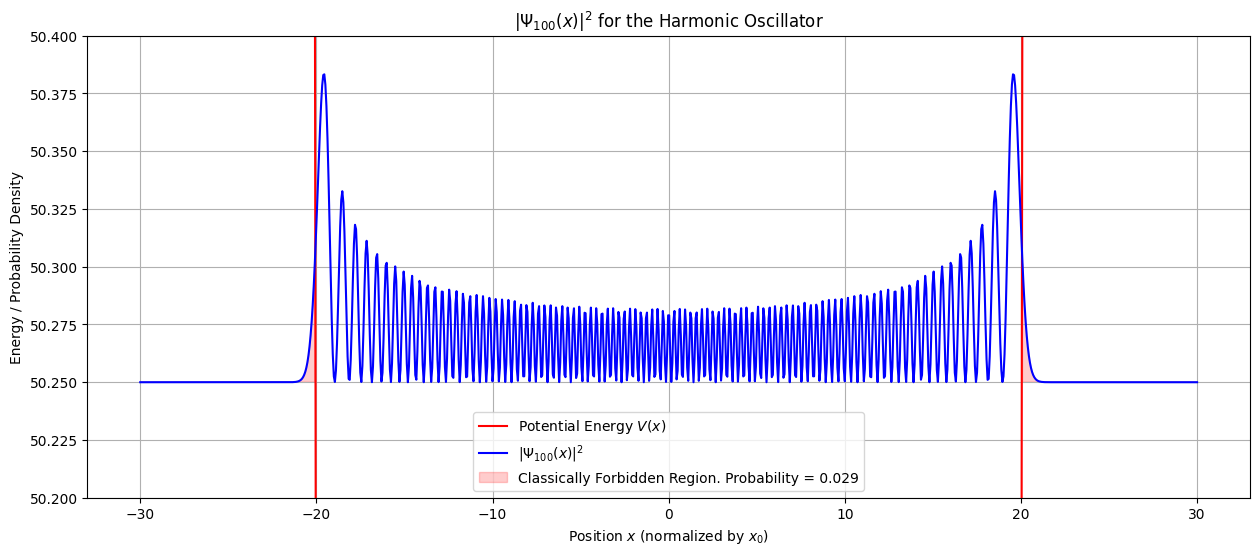

In [37]:
# Define the potential energy function V(x)
def V(x):
    return  osc_params.m * osc_params.omega**2 * x**2 / 2

# Define x values for plotting
limit = 30
x_vals = np.linspace(-limit * osc_params.x0, limit * osc_params.x0, 1000)

# Calculate values for |Ψ_100(x)|^2 and V(x)
psi_vals = np.abs(psi(100, x_vals)) ** 2
V_vals = V(x_vals)

# Plot the "V(x) - Ψ(x)" plot by stacking the potential and wavefunction
plt.figure(figsize=(15, 6))

# Plot the potential energy curve and wavefunction squared in the first subplot
xc = osc_params.x0 * np.sqrt(2 * (2 * 100 +  1))
prob_allowed, _ = quad(
    lambda x: np.abs(psi(100, x)) ** 2, -xc, xc, limit=100
)
prob_forbidden = 1 - prob_allowed

plt.plot(x_vals, V_vals, label="Potential Energy $V(x)$", color="red")
plt.plot(
    x_vals,
    psi_vals + (100 + 0.5) * osc_params.hbar * osc_params.omega,
    label="$|\\Psi_{100}(x)|^2$",
    color="blue",
)
plt.fill_between(
    x_vals,
    (100 + 0.5) * osc_params.hbar * osc_params.omega,
    psi_vals + (100 + 0.5) * osc_params.hbar * osc_params.omega,
    where=(x_vals < -xc) | (x_vals > xc),
    color="red",
    alpha=0.2,
    label=f"Classically Forbidden Region. Probability = {prob_forbidden:.3f}",
)
plt.ylim(50.2, 50.4)
# Add labels and legend to the first plot
plt.xlabel("Position $x$ (normalized by $x_0$)")
plt.ylabel("Energy / Probability Density")
plt.title("$|\\Psi_{100} (x)|^2$ for the Harmonic Oscillator")
plt.legend()
plt.grid(True)
plt.savefig("images/ex_34")
plt.show()

# Exercise 36

Extracted Period: 1.9379
Theoretical Period: 1.9390


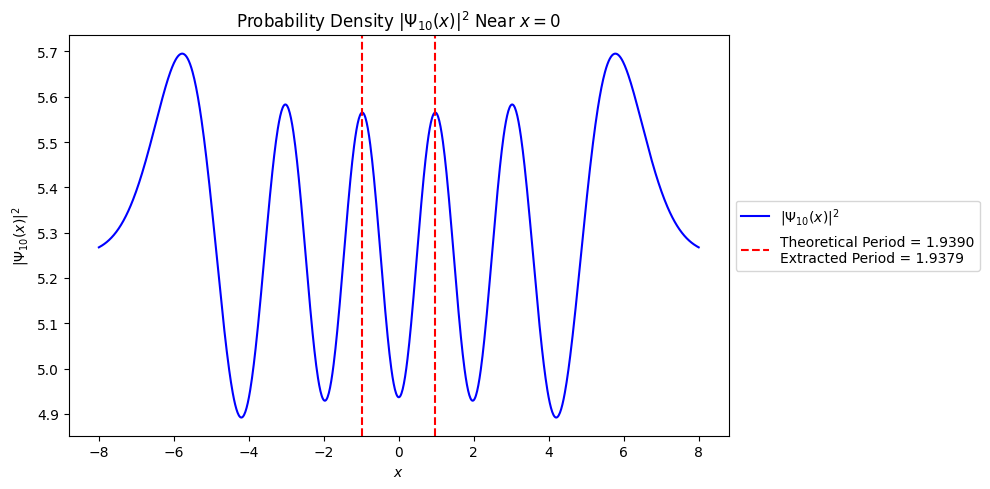

In [40]:
from scipy.signal import find_peaks

# Define the x range near x = 0 and calculate Psi10(x)
n = 10
limit = 8
x_vals = np.linspace(-limit * osc_params.x0, limit * osc_params.x0, 1000)
psi_10 = psi(n, x_vals)

# Find peaks of |Psi10(x)|^2 near x = 0
peaks, _ = find_peaks(
    psi_10, distance=20
)  # Adjust `distance` to avoid detecting minor peaks

# Find the two peak positions closest to x = 0
closest_peaks = sorted(x_vals[peaks], key=lambda x: abs(x))[:2]

# Calculate the period as the distance between these two closest peaks
extracted_period = abs(closest_peaks[1] - closest_peaks[0])
theoretical_period = 2 * np.pi * osc_params.x0 / np.sqrt(10 + 0.5)

print(
    f"Extracted Period: {extracted_period:.4f}",
)
print(f"Theoretical Period: {theoretical_period:.4f}")

# Plot |Psi10(x)|^2 and zoom in near x = 0
plt.figure(figsize=(10, 5))
plt.plot(
    x_vals,
    psi_10 + (10 + 0.5) * osc_params.hbar * osc_params.omega,
    label=r"$|\Psi_{10}(x)|^2$",
    color="blue",
)
plt.xlabel(r"$x$")
plt.ylabel(r"$|\Psi_{10}(x)|^2$")
plt.title(r"Probability Density $|\Psi_{10}(x)|^2$ Near $x = 0$")
plt.legend()

# Display theoretical period for comparison
plt.axvline(
    theoretical_period / 2,
    color="red",
    linestyle="--",
    label="Theoretical Period = {:.4f}\nExtracted Period = {:.4f}".format(
        theoretical_period, extracted_period
    ),
)
plt.axvline(-theoretical_period / 2, color="red", linestyle="--")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig("images/ex_36")
plt.show()

# Exercise 37

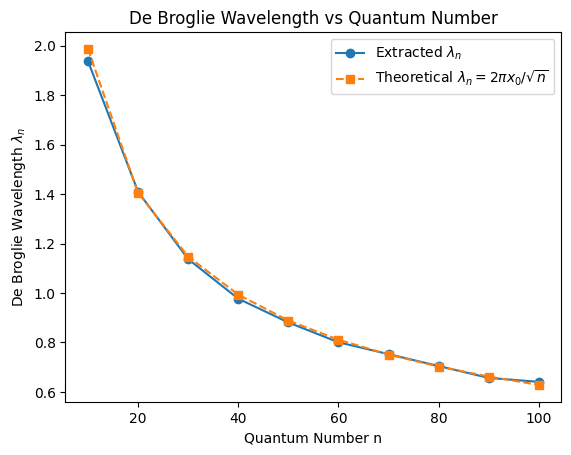

In [39]:
n_values = np.arange(10, 101, 10)
lambda_extracted = []
lambda_predicted = []

# Calculate λ_n for each n
for n in n_values:
    # Compute wavefunction and square of it (probability density)
    psi_n = psi(n, x_vals)

    # Find peaks of |Ψ_n(x)|^2 near x = 0 and calculate the spatial period
    peaks, _ = find_peaks(psi_n)

    # Find the two closest to zero
    closest_peaks = sorted(x_vals[peaks], key=lambda x: abs(x))[:2]
    extracted_period = abs(closest_peaks[1] - closest_peaks[0])

    # Store extracted and predicted λ_n values
    lambda_extracted.append(extracted_period)
    lambda_predicted.append(2 * np.pi * osc_params.x0 / np.sqrt(n))

# Plotting λ_n vs n
plt.plot(n_values, lambda_extracted, "o-", label=r"Extracted $λ_n$")
plt.plot(
    n_values, lambda_predicted, "s--", label=r"Theoretical $λ_n = 2\pi x_0/\sqrt{n}$"
)
plt.xlabel("Quantum Number n")
plt.ylabel(r"De Broglie Wavelength $λ_n$")
plt.title("De Broglie Wavelength vs Quantum Number")
plt.legend()
plt.savefig("images/ex_37")
plt.show()

# Exercise 38

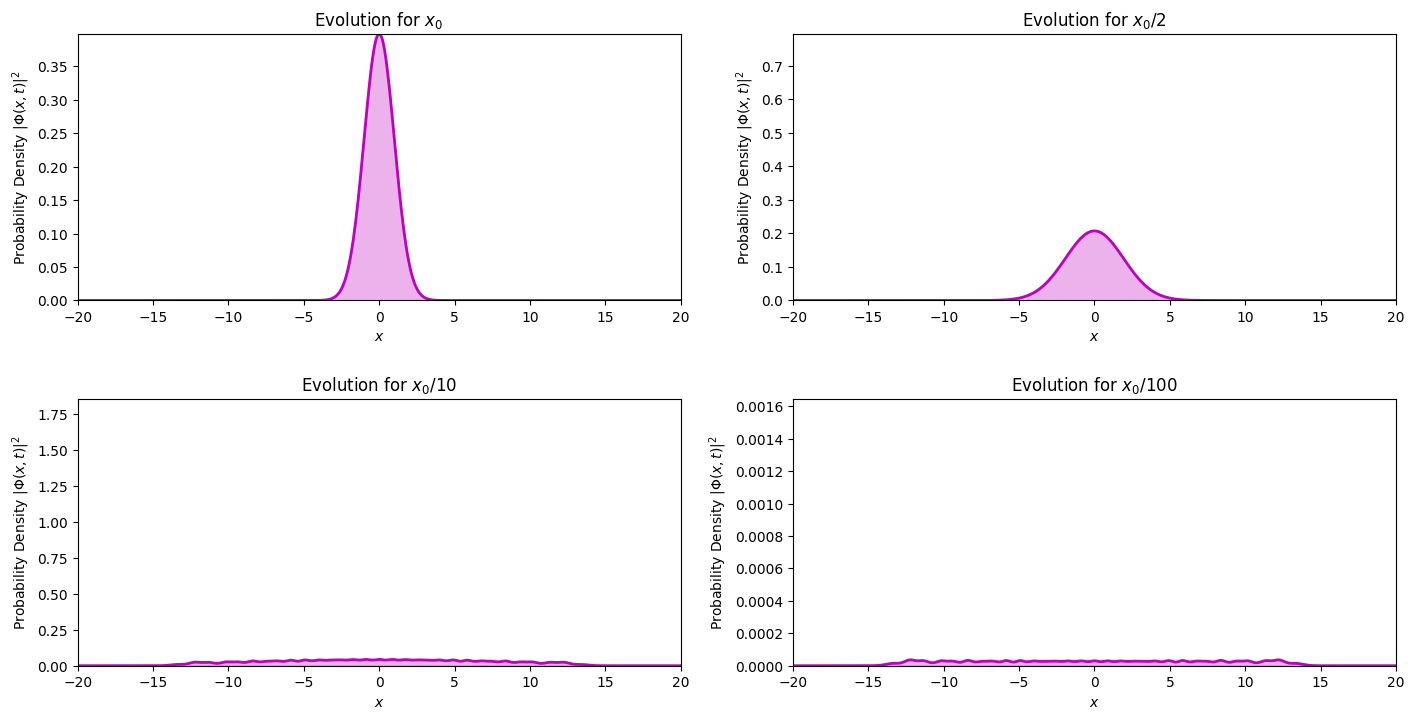

In [63]:
from matplotlib.animation import FuncAnimation

Nmax = 50  # Maximum Fock state to consider
x_vals = np.linspace(-20 * osc_params.x0, 20 * osc_params.x0, 500)  # Position space range
time_steps = 200  # Number of time steps for the animation
total_time = 10.0  # Total time for the animation
dt = total_time / time_steps  # Time step duration

# initial wavefunction
phi_x = lambda x, a: np.exp(-((x / (2 * a)) ** 2))/ np.sqrt(np.sqrt((2 * np.pi * a**2)))

# precompute psi for all n
psi_n = np.array(psi(Nmax, x_vals, True))

# Calculate coefficients φ_n for a given initial state Φ(x)
def phi_n(a):
    phi_x_a = phi_x(x_vals, a)
    func = phi_x_a * psi_n
    coeffs = np.trapz(func, x_vals)
    return coeffs


# precompute phi_n for different values of a
a_values = [osc_params.x0, osc_params.x0 / 2, osc_params.x0 / 10, osc_params.x0 / 100]
a_strs = ["$x_0$", "$x_0/2$", "$x_0/10$", "$x_0/100$"]

phi_n_coeffs_arr = np.array([phi_n(a) for a in a_values])

# time array
exponentials = np.exp(
    -1j * osc_params.omega * np.outer(np.arange(Nmax + 1), np.linspace(0, total_time, time_steps))
)

# precompute Time-evolved wavefunction Φ(x, t) using Eq. (76) for each value of a
phi_x_t = np.array(
    [
        (
            psi_n[:, :, np.newaxis]
            * exponentials[:, np.newaxis, :]
            * phi_n_coeffs[:, np.newaxis, np.newaxis]
        ).sum(axis=0)
        for phi_n_coeffs in phi_n_coeffs_arr
    ]
)

# Create and save animations for each value of a
# Initialize the plot
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
plt.tight_layout(pad=5.0)
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.set_xlim(x_vals[0], x_vals[-1])
    ax.set_ylim(0, np.max(np.abs(phi_x_t[i]) ** 2))
    ax.set_ylabel("Probability Density $|\Phi(x, t)|^2$")
    ax.set_xlabel("$x$")

line = [axes[i].plot([], [], lw=2)[0] for i in range(4)]
fill = [axes[i].fill_between([], [], alpha=0.3, color='m') for i in range(4)]

for idx in range(4):
    axes[idx].set_title(r"Evolution for {}".format(a_strs[idx]))

# Animation function
def animate(i):
    for idx, (a, label) in enumerate(zip(a_values, a_strs)):
        y_vals = np.abs(phi_x_t[idx, :, i]) ** 2
        line[idx].set_data(x_vals, y_vals)
        line[idx].set_color('m')
        # Remove previous fill
        for coll in axes[idx].collections:
            coll.remove()
        # Add new fill
        axes[idx].fill_between(x_vals, y_vals, alpha=0.3, color='m')
    return line


ani = FuncAnimation(fig, animate, frames=time_steps, blit=True)
ani.save(f"images/ex_38.gif", writer="ffmpeg", fps=30)
plt.show()

# Exercise 39

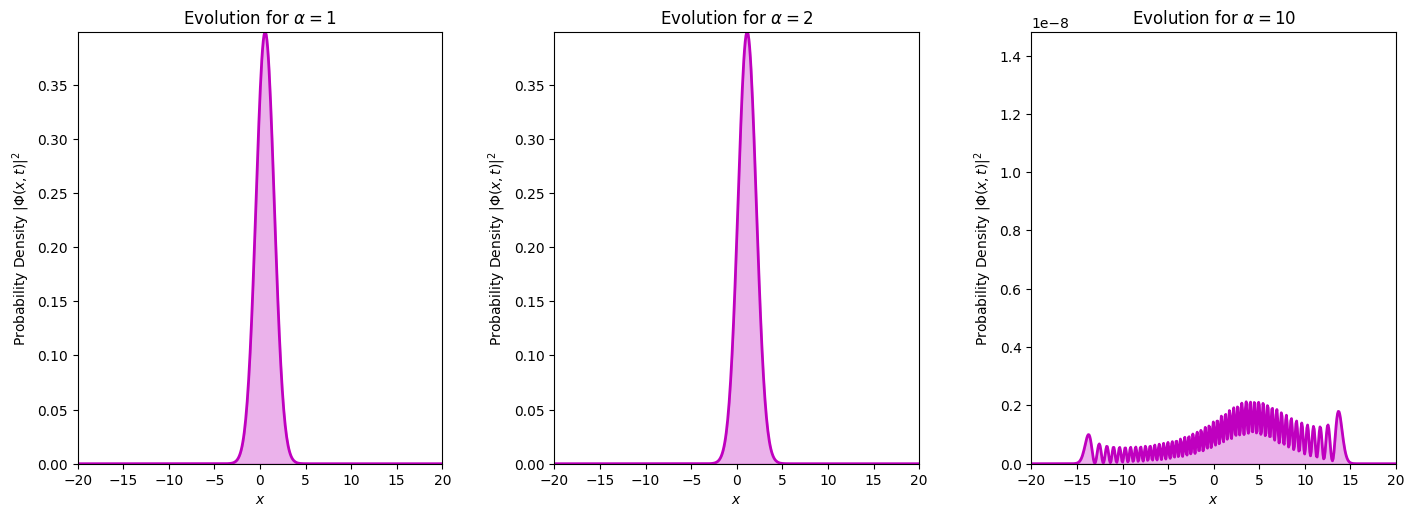

In [65]:
# Calculate coefficients φ_n = (α^n) / √n!
def phi_n(alpha):
    coeffs = [1.0]
    for n in range(1, Nmax + 1):
        coeffs.append(coeffs[n - 1] * alpha / np.sqrt(n))
    return np.array(coeffs) * np.exp(-np.abs(alpha) ** 2 / 2)


# precompute phi_n for different values of alpha
alpha_values = [1, 2, 10]
phi_n_coeffs_arr = np.array([phi_n(alpha) for alpha in alpha_values])

# precompute Time-evolved wavefunction Φ(x, t) using Eq. (76) for each value of alpha
phi_x_t = np.array(
    [
        (
            psi_n[:, :, np.newaxis]
            * exponentials[:, np.newaxis, :]
            * phi_n_coeffs[:, np.newaxis, np.newaxis]
        ).sum(axis=0)
        for phi_n_coeffs in phi_n_coeffs_arr
    ]
)


# Create and save animations for each value of a
# Initialize the plot
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
plt.tight_layout(pad=5.0)
axes = axes.flatten()
for i, ax in enumerate(axes):
    ax.set_xlim(x_vals[0], x_vals[-1])
    ax.set_ylim(0, np.max(np.abs(phi_x_t[i]) ** 2))
    ax.set_ylabel("Probability Density $|\Phi(x, t)|^2$")
    ax.set_xlabel("$x$")

line = [axes[i].plot([], [], lw=2)[0] for i in range(3)]
fill = [axes[i].fill_between([], [], alpha=0.3, color='m') for i in range(3)]

for idx in range(3):
    axes[idx].set_title(r"Evolution for $\alpha = {}$".format(alpha_values[idx]))
    

# Animation function
def animate(i):
    for idx, alpha in enumerate(alpha_values):
        y_vals = np.abs(phi_x_t[idx, :, i]) ** 2
        line[idx].set_data(x_vals, y_vals)
        line[idx].set_color('m')
        # Remove previous fill
        for coll in axes[idx].collections:
            coll.remove()
        # Add new fill
        axes[idx].fill_between(x_vals, y_vals, alpha=0.3, color='m')
    return line


ani = FuncAnimation(fig, animate, frames=time_steps, blit=True)
ani.save(f"images/ex_39.gif", writer="ffmpeg", fps=30)
plt.show()

# Exercise 40

In [ ]:
# Calculate coefficients φ_n = (|0> + |10>) / √2
def phi_n():
    coeffs = np.zeros(Nmax + 1)
    coeffs[0] = 1 / np.sqrt(2)
    coeffs[10] = 1 / np.sqrt(2)
    return coeffs


# precompute phi_n for different
phi_n_coeffs_arr = np.array([phi_n()])

# precompute Time-evolved wavefunction Φ(x, t) using Eq. (76) for each value of alpha
phi_x_t = np.array(
    [
        (
            psi_n[:, :, np.newaxis]
            * exponentials[:, np.newaxis, :]
            * phi_n_coeffs[:, np.newaxis, np.newaxis]
        ).sum(axis=0)
        for phi_n_coeffs in phi_n_coeffs_arr
    ]
)


# Create and save animations for each value of a
# Initialize the plot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.set_xlim(x_vals[0], x_vals[-1])
ax.set_ylim(0, np.max(np.abs(phi_x_t[0]) ** 2))
ax.set_ylabel("Probability Density $|\Phi(x, t)|^2$")
ax.set_xlabel("$x$")

line = [ax.plot([], [], lw=2)[0]]
fill = [ax.fill_between([], [], alpha=0.3, color='m')]

ax.set_title(
    r"Time Evolution with initial state $\left(|0\rangle + |1 \rangle \right)/\sqrt{2}$"
)

# Animation function
def animate(i):
    y_vals = np.abs(phi_x_t[0, :, i]) ** 2
    line[0].set_data(x_vals, y_vals)
    line[0].set_color('m')
    # Remove previous fill
    for coll in ax.collections:
        coll.remove()
    # Add new fill
    ax.fill_between(x_vals, y_vals, alpha=0.3, color='m')
    return line


ani = FuncAnimation(fig, animate, frames=time_steps, blit=True)
ani.save(f"images/ex_40.gif", writer="ffmpeg", fps=30)
plt.show()

# Exercise 41

In [41]:
from scipy.linalg import eigh

K = osc_params.omega / 10
Nmax = 50

# Define the annihilation and creation operators a and a† in matrix form
a = np.diag(np.sqrt(np.arange(1, Nmax + 1)), 1)  # a: lowers the quantum number by 1
a_dag = np.diag(
    np.sqrt(np.arange(1, Nmax + 1)), -1
)  # a†: raises the quantum number by 1

# Construct H0 = ℏω(a†a + 1/2)
H0 = osc_params.hbar * osc_params.omega * (a_dag @ a + 0.5 * np.eye(Nmax + 1))

# Construct H1 = ℏK(a + a†)^4
a_plus_a_dag = a + a_dag
H1 = osc_params.hbar * K * np.linalg.matrix_power(a_plus_a_dag, 4)

# Full Hamiltonian H = H0 + H1
H = H0 + H1

# Solve for the eigenvalues and eigenstates of H
eigenvalues, eigenstates = eigh(H)

# Get the 4 lowest energy eigenvalues and eigenstates
lowest_eigenvalues = eigenvalues[:4]
lowest_eigenstates = eigenstates[:, :4]

# Print results
print("The four lowest energy eigenvalues are:")
for i, eig in enumerate(lowest_eigenvalues):
    print(f"Eigenvalue {i + 1}: {eig:.2f}")

print(
    "\nThe corresponding eigenstates (in the basis of H0) are in columns of `lowest_eigenstates`."
)
for i, eig in enumerate(lowest_eigenstates.T):
    print(f"Eigenstate {i + 1}:")
    print(np.around(eig, 2))
    print("-" * 80)

The four lowest energy eigenvalues are:
Eigenvalue 1: 0.33
Eigenvalue 2: 1.11
Eigenvalue 3: 2.05
Eigenvalue 4: 3.11

The corresponding eigenstates (in the basis of H0) are in columns of `lowest_eigenstates`.
Eigenstate 1:
[ 0.99  0.   -0.16 -0.    0.01  0.    0.01 -0.   -0.01  0.    0.   -0.
 -0.   -0.    0.    0.    0.    0.   -0.   -0.    0.    0.   -0.   -0.
  0.    0.    0.   -0.   -0.    0.    0.    0.   -0.   -0.    0.    0.
 -0.   -0.   -0.    0.    0.   -0.   -0.   -0.    0.    0.   -0.   -0.
  0.    0.    0.  ]
--------------------------------------------------------------------------------
Eigenstate 2:
[-0.    0.94 -0.   -0.34  0.    0.09 -0.   -0.01  0.   -0.01 -0.    0.01
  0.   -0.    0.    0.   -0.   -0.    0.   -0.   -0.    0.    0.   -0.
 -0.    0.   -0.   -0.    0.    0.   -0.    0.    0.   -0.   -0.    0.
 -0.   -0.    0.    0.   -0.   -0.    0.   -0.    0.    0.   -0.   -0.
  0.    0.   -0.  ]
-------------------------------------------------------------------------

# Exercise 42

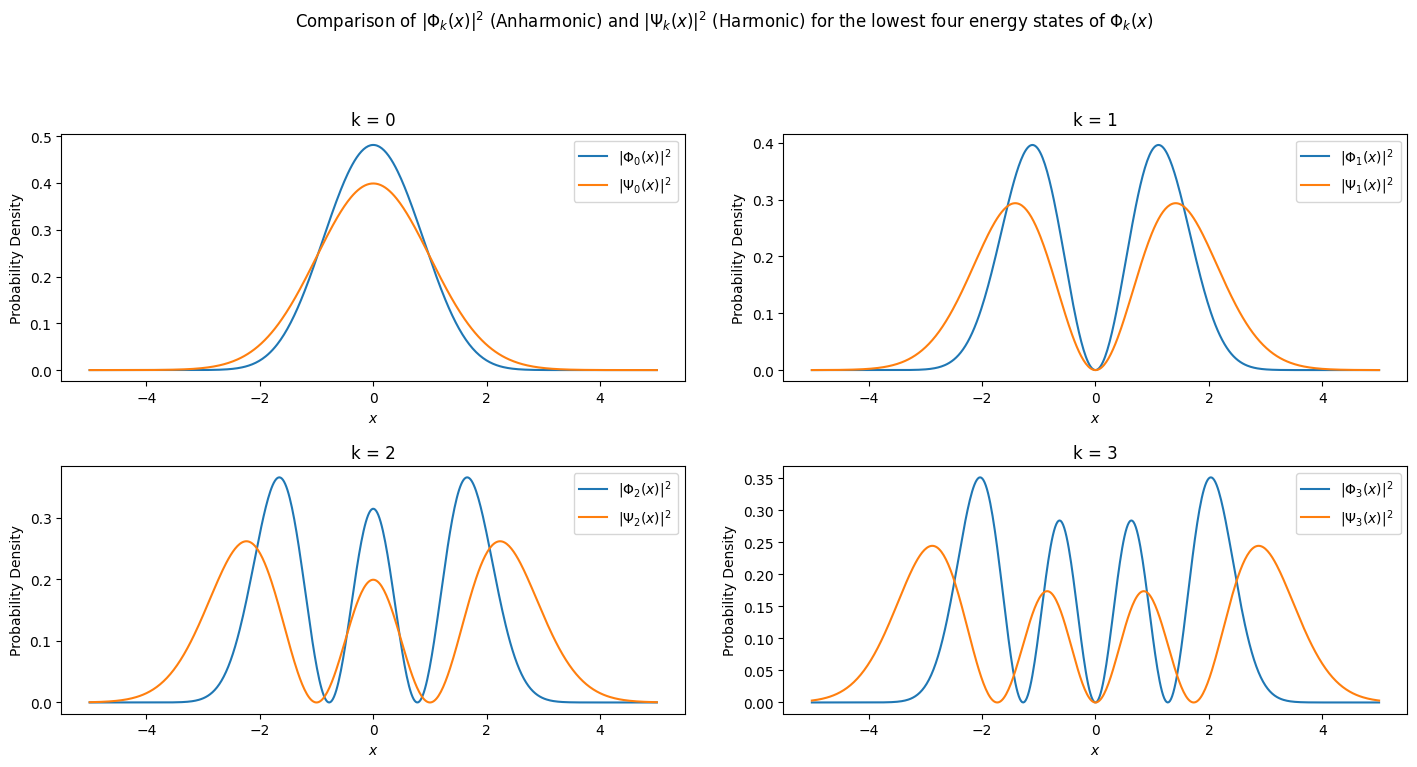

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import simps
from scipy.special import hermite

# Create a grid for x
x_vals = np.linspace(-5 * osc_params.x0, 5 * osc_params.x0, 500)

# precompute psi for all n
psi_n = np.array(psi(Nmax, x_vals, True))
lowest_eigenstates[:, 0, np.newaxis].shape
phi_k_x = np.array(
    [
        psi_n * lowest_eigenstates[:, i, np.newaxis]
        for i in range(lowest_eigenstates.shape[1])
    ]
).sum(axis=1)

fig, axes = plt.subplots(2, 2, figsize=(15, 8))
fig.suptitle(
    r"Comparison of $|\Phi_k(x)|^2$ (Anharmonic) and $|\Psi_k(x)|^2$ (Harmonic) for the lowest four energy states of $\Phi_k(x)$"
)
plt.tight_layout(pad=4.0)
axes = axes.flatten()
for k, ax in enumerate(axes):
    ax.set_ylabel("Probability Density")
    ax.set_xlabel("$x$")
    ax.set_title(r"k = {}".format(k))

# Plot Φ_k(x) and Ψ_k(x) for k = 0, 1, 2, 3
for k in range(4):
    axes[k].plot(x_vals, np.abs(phi_k_x[k]) ** 2, label=r"$|\Phi_{}(x)|^2$".format(k))
    axes[k].plot(x_vals, np.abs(psi_n[k]) ** 2, label=r"$|\Psi_{}(x)|^2$ ".format(k))
    axes[k].legend()

plt.show()

# Exercise 43

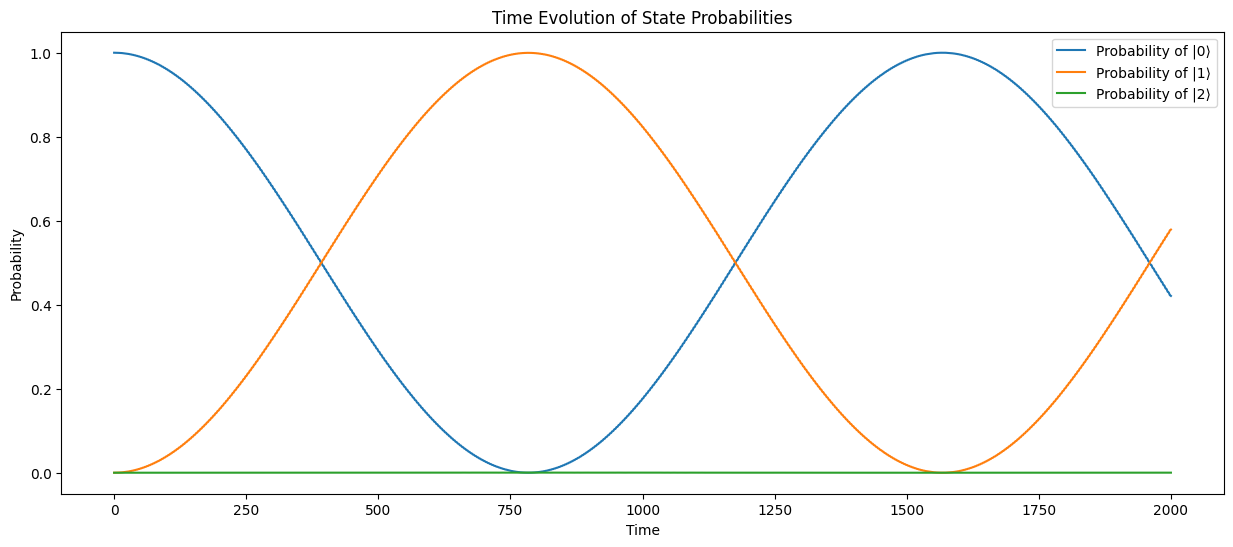

In [43]:
import qutip

# Solve for the eigenvalues and eigenstates of H (from exercise 40)
eigenvalues, eigenstates = eigh(H)

E0 = eigenvalues[0]
E1 = eigenvalues[1]
E2 = eigenvalues[2]

omega_d = (E1 - E0) / osc_params.hbar  # Drive frequency
g = osc_params.omega / 100

drive_matrix = eigenstates[:, :3].T.conj() @ a_plus_a_dag @ eigenstates[:, :3]


# Time-dependent Hamiltonian
def H_t(t):
    return qutip.Qobj(np.diag([E0, E1, E2]) + drive_matrix * g * np.cos(omega_d * t))


# Initial state: Start in the ground state |0⟩
psi0 = qutip.basis(3, 0)

# Time range for simulation
t_max = 2000
t_eval = np.linspace(0, t_max, t_max)  # Times at which to evaluate the solution

# Solve the time-dependent Schrödinger equation
result = qutip.mesolve(
    H_t,
    psi0,
    t_eval,
    [],
    [qutip.basis(3, i) * qutip.basis(3, i).dag() for i in range(3)],
)

# Plotting the probabilities over time
fig = plt.figure(figsize=(15, 6))
plt.plot(t_eval, result.expect[0], label="Probability of |0⟩")
plt.plot(t_eval, result.expect[1], label="Probability of |1⟩")
plt.plot(t_eval, result.expect[2], label="Probability of |2⟩")
plt.xlabel("Time")
plt.ylabel("Probability")
plt.legend()
plt.title("Time Evolution of State Probabilities")
plt.show()

# Exercise 44

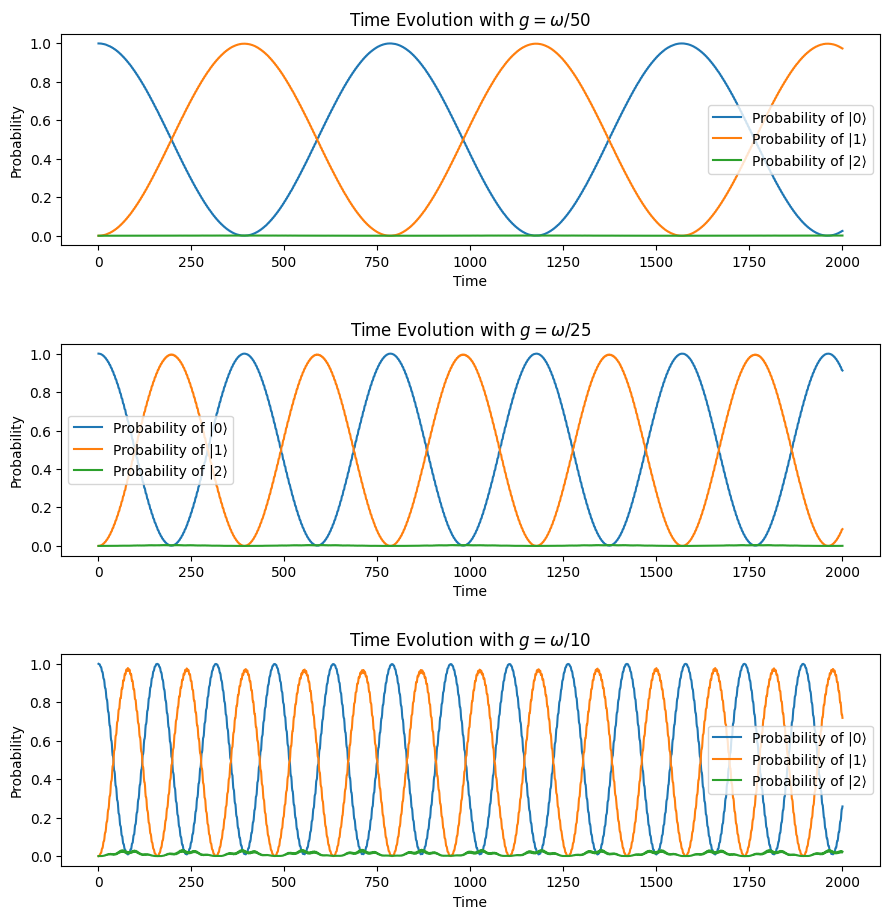

In [44]:
# Time-dependent Hamiltonian
def H_t(t, args):
    return qutip.Qobj(
        np.diag([E0, E1, E2]) + drive_matrix * args["g"] * np.cos(omega_d * t)
    )


# Solve the time-dependent Schrödinger equation
g_vals = [osc_params.omega / 50, osc_params.omega / 25, osc_params.omega / 10]
g_text = ["$\omega/50$", "$\omega/25$", "$\omega/10$"]
basis_matrices = [qutip.basis(3, i) * qutip.basis(3, i).dag() for i in range(3)]

fig, axes = plt.subplots(3, 1, figsize=(10, 10))
plt.tight_layout(pad=5.0)
axes = axes.flatten()
for i, ax in enumerate(axes):
    ax.set_xlabel("Time")
    ax.set_ylabel("Probability")
    ax.set_title(r"Time Evolution with $g=${}".format(g_text[i]))

for idx, (g, label) in enumerate(zip(g_vals, g_text)):
    result = qutip.mesolve(H_t, psi0, t_eval, [], basis_matrices, args={"g": g})

    # Plotting the probabilities over time
    axes[idx].plot(t_eval, result.expect[0], label="Probability of |0⟩")
    axes[idx].plot(t_eval, result.expect[1], label="Probability of |1⟩")
    axes[idx].plot(t_eval, result.expect[2], label="Probability of |2⟩")
    axes[idx].legend()

# Exercise 45

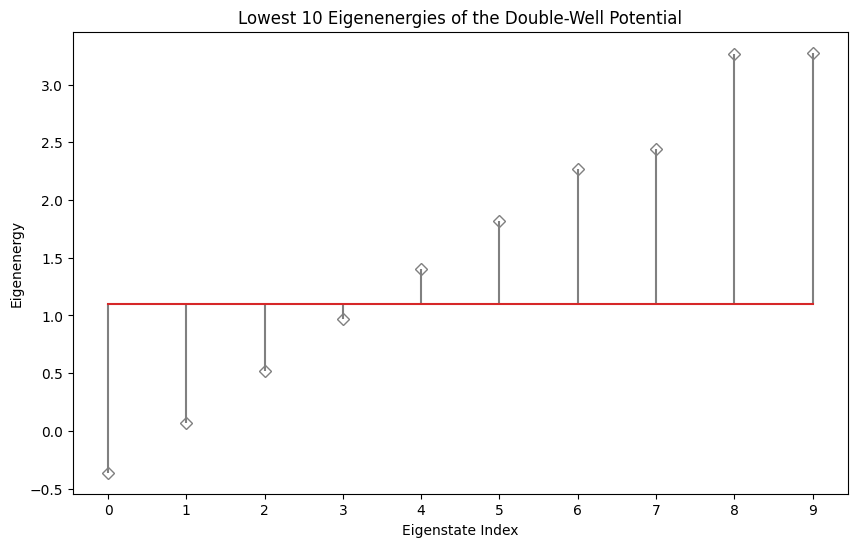

In [45]:
from scipy.linalg import expm

B = 10 * osc_params.hbar * osc_params.omega
N_max = 100  # Basis size for harmonic oscillator

# Define the annihilation and creation operators a and a† in matrix form
a = np.diag(np.sqrt(np.arange(1, N_max + 1)), 1)  # a: lowers the quantum number by 1
a_dag = np.diag(
    np.sqrt(np.arange(1, N_max + 1)), -1
)  # a†: raises the quantum number by 1

# Construct H0 = ℏω(a†a + 1/2)
H0 = osc_params.hbar * osc_params.omega * (a_dag @ a + 0.5 * np.eye(N_max + 1))

# Displacement operators
D_op = lambda alpha: expm(alpha * a_dag - np.conjugate(alpha) * a)

# Potential term H1 using displacement operators
param = 2 * np.pi * 1j
H1 = B * (D_op(param) + D_op(param).conj().T) / 2

# Full Hamiltonian H = H0 + H1
H = H0 + H1

# Solve for the eigenvalues and eigenstates of H
eigenvalues, eigenstates = eigh(H)

# Get the 10 lowest energy eigenvalues and eigenstates
lowest_eigenvalues = eigenvalues[:10]
lowest_eigenstates = eigenstates[:, :10]

# Plot the lowest eigenvalues to observe the tunneling gap
plt.figure(figsize=(10, 6))
markerline, stemlines, baseline = plt.stem(
    range(10), lowest_eigenvalues, linefmt="grey", markerfmt="D", bottom=1.1
)
markerline.set_markerfacecolor("none")
plt.xticks(range(10))
plt.xlabel("Eigenstate Index")
plt.ylabel("Eigenenergy")
plt.title("Lowest 10 Eigenenergies of the Double-Well Potential")
plt.show()

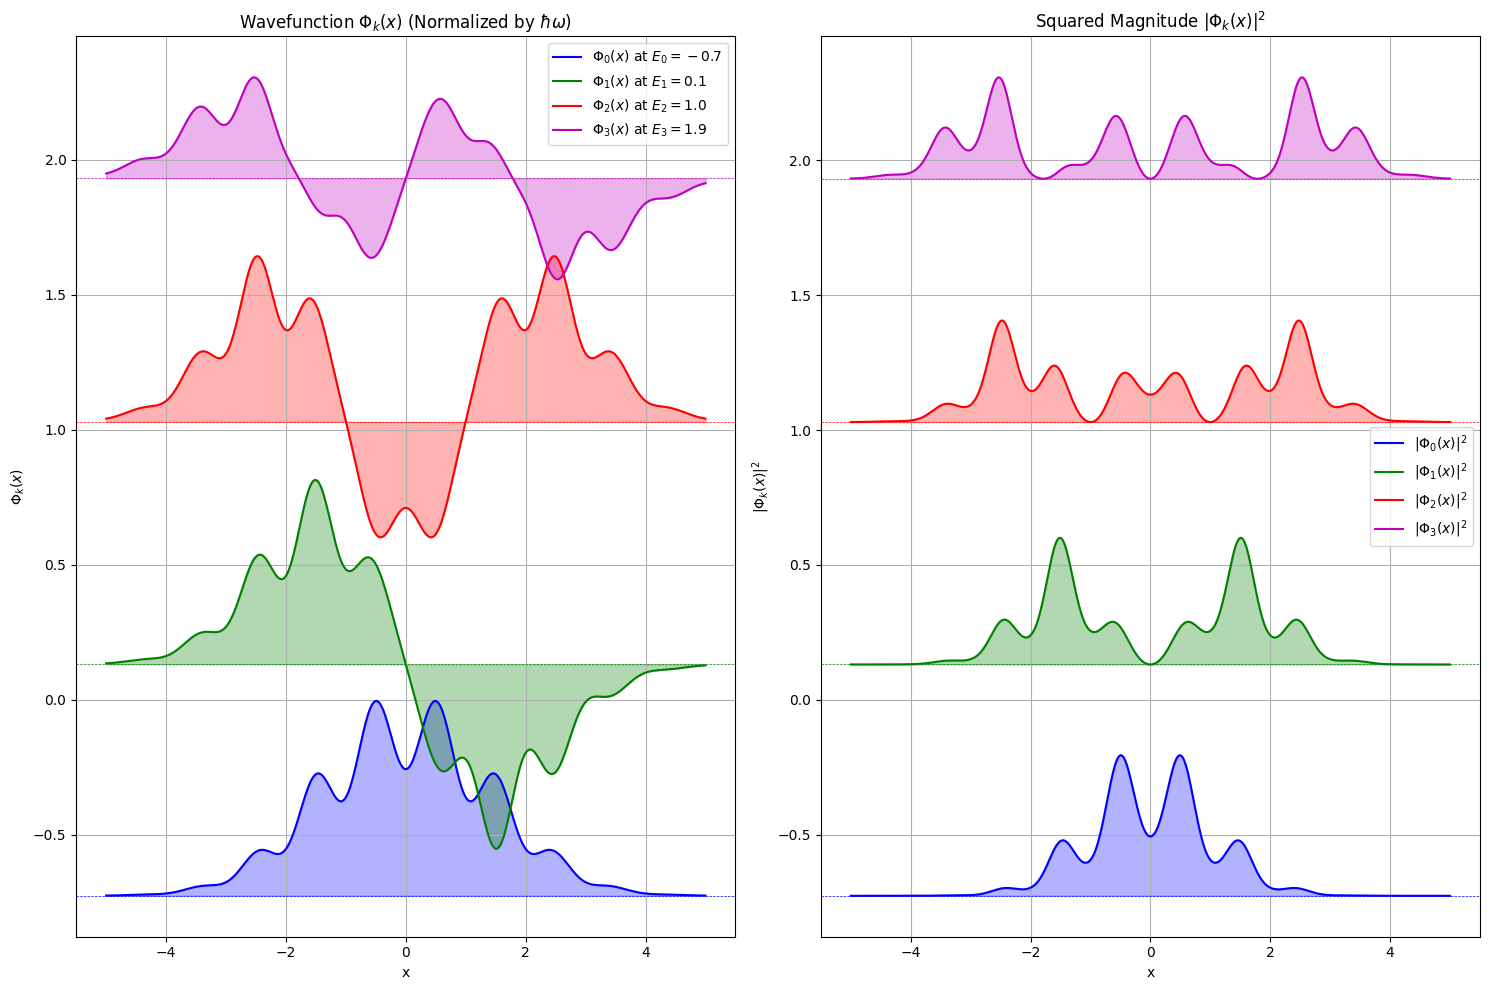

In [46]:
# Function to plot wavefunctions in position space
x_vals = np.linspace(-5 * osc_params.x0, 5 * osc_params.x0, 500)


# precompute psi for all n
psi_n = np.array(psi(N_max, x_vals, True))

phi_k_x = np.array(
    [
        psi_n * lowest_eigenstates[:, i, np.newaxis]
        for i in range(lowest_eigenstates.shape[1])
    ]
).sum(axis=1)

fig, axes = plt.subplots(1, 2, figsize=(15, 10))

axes[0].set_title("Wavefunction $\Phi_k(x)$ (Normalized by $\hbar \omega$)")

for k, color in enumerate(["b", "g", "r", "m"]):
    energy_level = lowest_eigenvalues[k]

    normalized_energy_level = energy_level / (osc_params.hbar * osc_params.omega)

    # Shift the wavefunction by its energy level for vertical stacking
    axes[0].plot(
        x_vals,
        normalized_energy_level + phi_k_x[k].real,
        color=color,
        label=f"$\Phi_{k}(x)$ at $E_{k} = {normalized_energy_level:.1f}$",
    )
    axes[0].fill_between(
        x_vals,
        normalized_energy_level,
        normalized_energy_level + phi_k_x[k].real,
        color=color,
        alpha=0.3,
    )

    # Draw horizontal lines for energy levels
    axes[0].axhline(
        y=normalized_energy_level, color=color, linestyle="--", linewidth=0.5
    )

axes[0].set_xlabel("x")
axes[0].set_ylabel(r"$\Phi_k(x)$")
axes[0].grid(True)
axes[0].legend()

axes[1].set_title("Squared Magnitude $|\Phi_k(x)|^2$")

for k, color in enumerate(["b", "g", "r", "m"]):
    energy_level = lowest_eigenvalues[k]
    normalized_energy_level = energy_level / (osc_params.hbar * osc_params.omega)

    # Shift the wavefunction by its energy level for vertical stacking
    axes[1].plot(
        x_vals,
        normalized_energy_level + np.abs(phi_k_x[k]) ** 2,
        color=color,
        label=f"$|\Phi_{k}(x)|^2$",
    )
    axes[1].fill_between(
        x_vals,
        normalized_energy_level,
        normalized_energy_level + np.abs(phi_k_x[k]) ** 2,
        color=color,
        alpha=0.3,
    )

    # Draw horizontal lines for energy levels
    axes[1].axhline(
        y=normalized_energy_level, color=color, linestyle="--", linewidth=0.5
    )

axes[1].set_xlabel("x")
axes[1].set_ylabel(r"$|\Phi_k(x)|^2$")
axes[1].grid(True)
axes[1].legend()


plt.tight_layout()
plt.show()

# Exercise 46

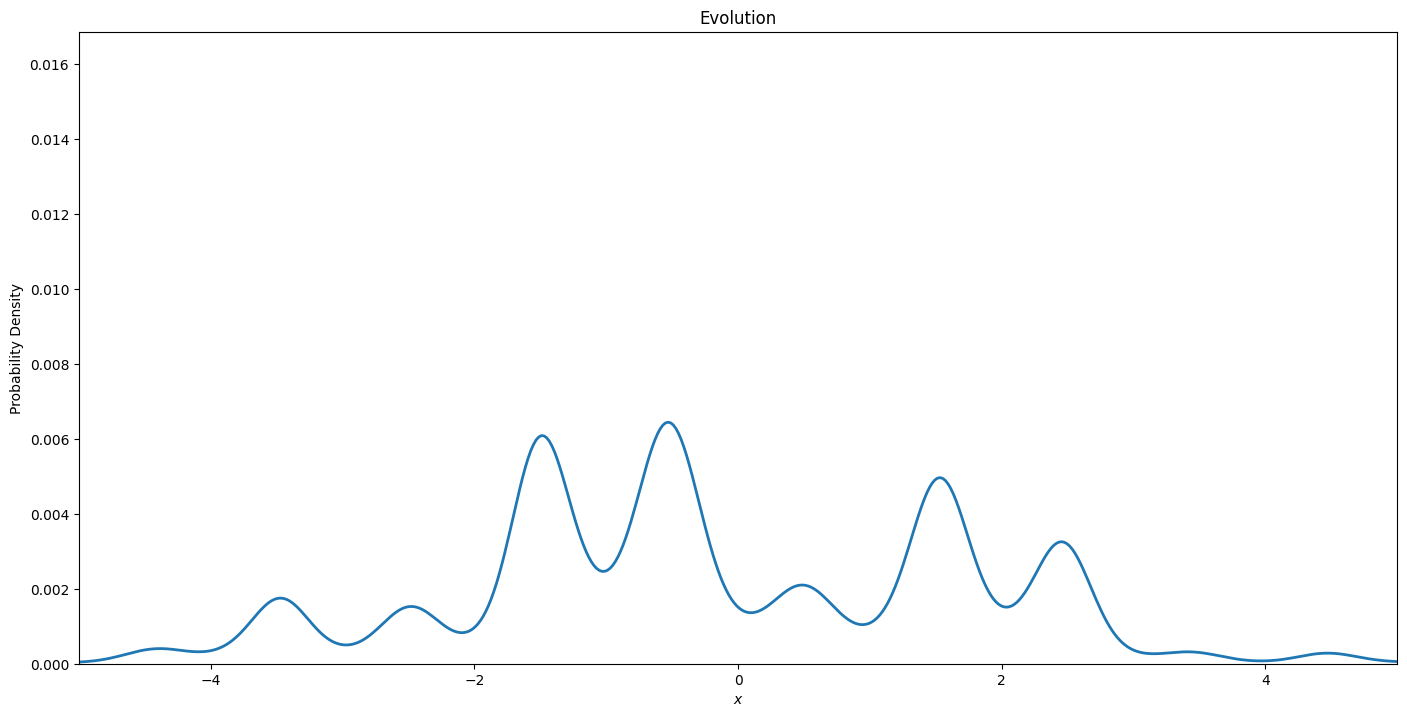

In [47]:
Nmax = 50  # Maximum Fock state to consider
time_steps = 500  # Number of time steps for the animation
total_time = 60.0  # Total time for the animation
dt = total_time / time_steps  # Time step duration

# Localized initial state in the left well
initial_wavefunction = np.exp(-((x_vals + osc_params.x0) ** 2) / (2 * (osc_params.x0 / 2) ** 2))
initial_wavefunction /= np.linalg.norm(initial_wavefunction)

# Calculate coefficients φ_n for a given initial state
phi_n_coeffs = np.trapz(initial_wavefunction * phi_k_x, x_vals)

# time array
exponentials = np.exp(
    -1j * osc_params.omega * np.outer(np.arange(10), np.linspace(0, total_time, time_steps))
)

# precompute Time-evolved wavefunction Φ(x, t) using Eq. (76) for each value of a
phi_x_t = (
    phi_k_x[:, :, np.newaxis]
    * exponentials[:, np.newaxis, :]
    * phi_n_coeffs[:, np.newaxis, np.newaxis]
).sum(axis=0)

# Create and save animations for each value of a
# Initialize the plot
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
plt.tight_layout(pad=5.0)

ax.set_xlim(x_vals[0], x_vals[-1])
ax.set_ylim(0, np.max(np.abs(phi_x_t) ** 2))
ax.set_ylabel("Probability Density")
ax.set_xlabel("$x$")

line = [ax.plot([], [], lw=2)[0]]
ax.set_title(r"Evolution")


# Animation function
def animate(i):
    line[0].set_data(x_vals, np.abs(phi_x_t[:, i]) ** 2)
    return line


ani = FuncAnimation(fig, animate, frames=time_steps, blit=True)
ani.save(f"tunneling.gif", writer="ffmpeg", fps=30)
plt.show()

# Exercise 47


### Matrix Representation of Position Operator $\hat{x}$

In the harmonic oscillator, the position operator $\hat{x}$ is related to the annihilation and creation operators $\hat{a}$ and $\hat{a}^\dagger$ as:
$$
\hat{x} = x_0 (\hat{a} + \hat{a}^\dagger)
$$
where $x_0$ is the characteristic length scale of the oscillator. In the Fock basis, the matrix elements of $\hat{x}$ are given by:
$$
\langle n | \hat{x} | m \rangle = x_0 \left( \sqrt{m} \delta_{n, m-1} + \sqrt{m+1} \delta_{n, m+1} \right)
$$
This representation accounts for the position operator's action on the energy eigenstates.
- The matrix element $\langle n | \hat{a} | m \rangle$ is $\sqrt{m}$ if $n = m-1$.
- The matrix element $\langle n | \hat{a}^\dagger | m \rangle$ is $\sqrt{m + 1}$ if $n = m+1$.

### Diagonalization of $\hat{x}$ Matrix

Next, we diagonalize the matrix representation of $\hat{x}$ to find its eigenvalues and eigenvectors. The eigenvalues correspond to possible positions $x'$, and the eigenvectors describe the probability amplitudes for each Fock state.

### Constructing the Wavefunction for Position Eigenstate

To construct the wavefunction $\Psi_{x'}(x)$ corresponding to a position eigenstate, we expand it in the Fock basis. The wavefunction can be written as:
$$
\Psi_{x'}(x) = \sum_{n=0}^{N_{\text{max}}} \psi_{x',n} \Psi_n(x)
$$
where $\psi_{x',n}$ are the coefficients from the eigenvector corresponding to the eigenvalue $x'$, and $\Psi_n(x)$ are the harmonic oscillator wavefunctions for the Fock states.


### Results and Discussion

For small values of $N_{\text{max}}$, the wavefunction will be spread out over a wide range of positions. As $N_{\text{max}}$ increases, the wavefunction becomes more localized, although it will still have a non-zero spread due to the truncation of the Fock space. In the limit $N_{\text{max}} \to \infty$, the position eigenstate is represented by a delta function $\delta(x - x')$, which corresponds to perfect localization.

### Conclusion

This exercise demonstrates how the wavefunction for a position eigenstate is represented in the truncated Fock basis and how increasing $N_{\text{max}}$ improves the approximation. For finite $N_{\text{max}}$, the wavefunction is spread out, but with larger $N_{\text{max}}$, it becomes increasingly localized.


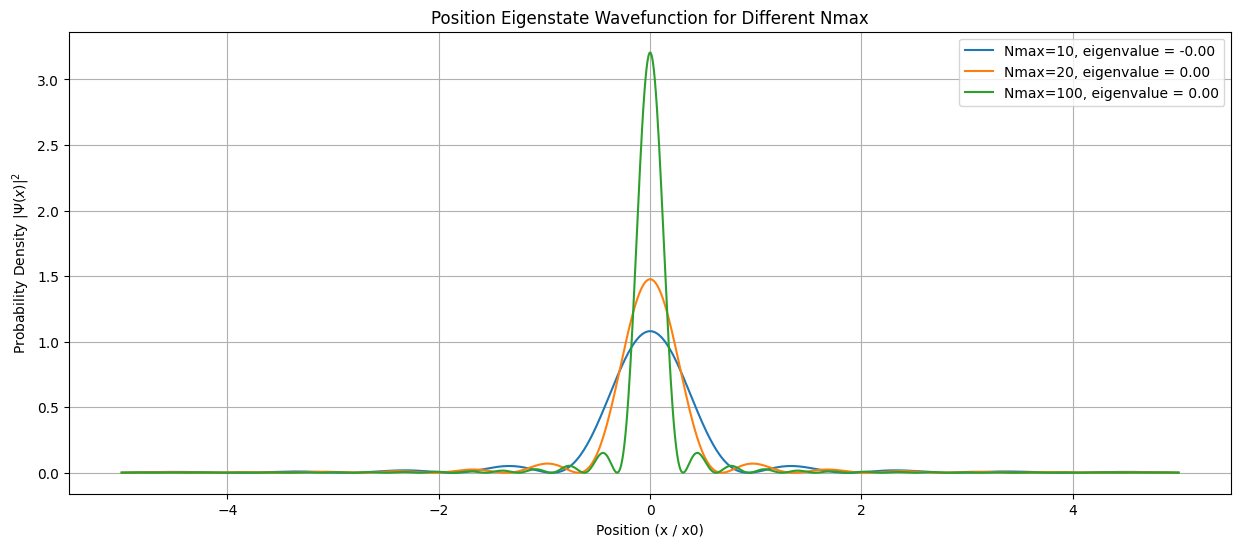

In [48]:
Nmax_values = [10, 20, 100]  # Number of energy states to truncate
x_vals = np.linspace(-5 * osc_params.x0, 5 * osc_params.x0, 1000)

# Constructing the matrix for position operator x in the truncated Fock basis
def construct_x_matrix(Nmax, x0):
    matrix = np.zeros((Nmax + 1, Nmax + 1))
    for n in range(Nmax + 1):
        if n > 0:
            matrix[n, n-1] = np.sqrt(n)
        if n < Nmax:
            matrix[n, n+1] = np.sqrt(n + 1)
    matrix *= x0
    return matrix

# Diagonalize the position matrix and get the wavefunction
def get_position_wavefunction(Nmax, x0, x_range):
    # Construct position matrix
    x_matrix = construct_x_matrix(Nmax, x0)
    assert np.allclose(x_matrix, x_matrix.conj().T)
    
    # Eigenvalue problem
    eigvals, eigvecs = eigh(x_matrix)
    
    # Select the eigenstate closest to x = 0
    closest_eigenvalue_idx = np.argmin(np.abs(eigvals))  # Find closest to x = 0
    eigenvector = eigvecs[:, closest_eigenvalue_idx]
    
    # Construct the wavefunction for position eigenstate
    psi_n = np.array(psi(Nmax, x_range, True))
    wavefunction = (psi_n * eigenvector[:, np.newaxis]).sum(axis=0)
   
    return eigvals[closest_eigenvalue_idx], wavefunction

# Plot wavefunctions for different Nmax values
plt.figure(figsize=(15, 6))
for Nmax in Nmax_values:
    eigval, wavefunction = get_position_wavefunction(Nmax, osc_params.x0, x_vals)
    plt.plot(x_vals / osc_params.x0, np.abs(wavefunction)**2, label=f'Nmax={Nmax}, eigenvalue = {eigval:.2f}')

plt.xlabel('Position (x / x0)')
plt.ylabel('Probability Density $|\Psi(x)|^2$')
plt.title('Position Eigenstate Wavefunction for Different Nmax')
plt.legend()
plt.grid(True)
plt.show()

# Exercise 48

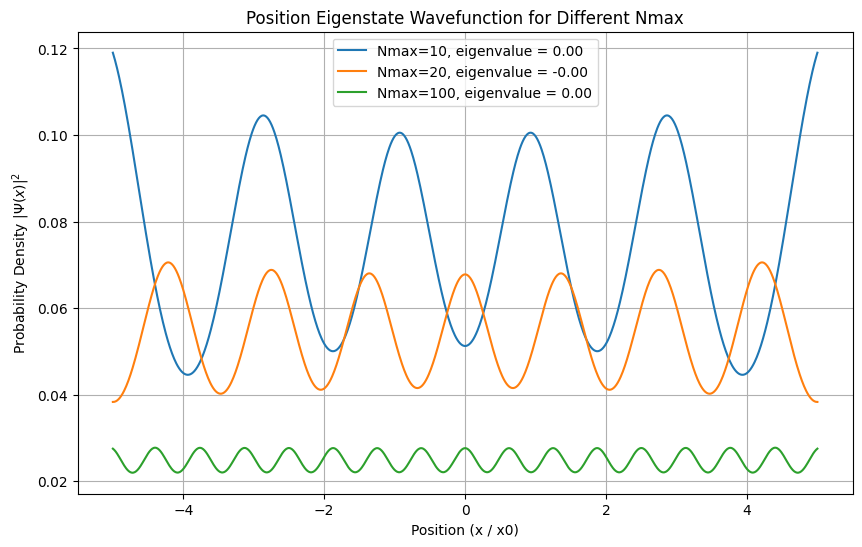

In [49]:
# Constructing the matrix for position operator p in the truncated Fock basis
def construct_p_matrix(Nmax, p0):
    matrix = np.zeros((Nmax + 1, Nmax + 1), dtype=np.complex64)
    for n in range(Nmax + 1):
        if n > 0:
            matrix[n, n-1] = -1j * np.sqrt(n)
        if n < Nmax:
            matrix[n, n+1] = 1j * np.sqrt(n + 1)
    matrix *= p0
    return matrix

# Diagonalize the p matrix and get the wavefunction
def get_momentum_wavefunction(Nmax, p0, x_range):
    # Construct position matrix
    p_matrix = construct_p_matrix(Nmax, p0)
    assert np.allclose(p_matrix, p_matrix.conj().T)
    
    # Eigenvalue problem
    eigvals, eigvecs = eigh(p_matrix)
    
    # Select the eigenstate closest to x = 0
    closest_eigenvalue_idx = np.argmin(np.abs(eigvals))  # Find closest to x = 0
    eigenvector = eigvecs[:, closest_eigenvalue_idx]
    
    # Construct the wavefunction for position eigenstate
    psi_n = np.array(psi(Nmax, x_range, True))
    wavefunction = (psi_n * eigenvector[:, np.newaxis]).sum(axis=0)
    
    return eigvals[closest_eigenvalue_idx], wavefunction

# Plot wavefunctions for different Nmax values
plt.figure(figsize=(10, 6))
for Nmax in Nmax_values:
    eigval, wavefunction = get_momentum_wavefunction(Nmax, osc_params.p0, x_vals)
    # lambda_de_broglie = 2 * np.pi * hbar / np.abs(eigval)
    # print(lambda_de_broglie)
    plt.plot(x_vals / osc_params.x0, np.abs(wavefunction)**2, label=f'Nmax={Nmax}, eigenvalue = {eigval:.2f}')

plt.xlabel('Position (x / x0)')
plt.ylabel('Probability Density $|\Psi(x)|^2$')
plt.title('Position Eigenstate Wavefunction for Different Nmax')
plt.legend()
plt.grid(True)
plt.show()
